Diamond Scatter Plot

In [15]:
import pandas as pd
import numpy as np
from mplfooty.pitch import Pitch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

Load Data

In [2]:
df_chain = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/match_chains.csv")
df_chain.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
0,1,centreBounce,goal,1.0,1,13,13.0,Brisbane Lions,NaN,NaN,NaN,Centre Bounce,0.0,0.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
1,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
2,1,centreBounce,goal,3.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Handball,9.0,-6.0,ineffective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
3,1,centreBounce,goal,4.0,1,13,28.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Loose Ball Get,11.0,-7.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
4,1,centreBounce,goal,5.0,1,13,29.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Handball,12.0,-5.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021


In [3]:
df_shots = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/shot_chains_xScore.csv", low_memory=False)
df_shots.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
0,1,centreBounce,goal,11.0,1,13,39.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,26.0,-21.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,0.0,0.0,0.0,Kick,Handball Received,Handball,Gather from Opposition,26.0,18.0,11.0,6.0,-21.0,-23.0,-26.0,-27.0,39.0,38.0,37.0,36.0,26.0,1.0,8.246211,52.0,21.0,56.080300,0.383818,21.991130,0.106164,6.082774,0.327040,18.737997,2704.0,3.951244,False,6,True,0,1,0,0,0,0.377382,0.423225,0.206330,0.374782,0.420309,0.204908,2.669003
1,6,possGain,goal,61.0,1,149,168.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,35.0,19.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,6.0,0.0,6.0,Kick,Handball Received,Handball,Loose Ball Get,35.0,28.0,25.0,22.0,19.0,19.0,26.0,29.0,168.0,167.0,165.0,165.0,19.0,1.0,7.000000,43.0,19.0,47.010637,0.416065,23.838740,0.125105,7.167963,0.389831,22.335680,1849.0,3.761200,False,53,True,0,0,0,1,0,0.309688,0.365276,0.175964,0.363941,0.429268,0.206791,2.612916
2,10,possGain,goal,110.0,1,285,306.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Kick,50.0,24.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,12.0,0.0,12.0,Kick,Gather,Kick Inside 50 Result,Kick Into F50,50.0,50.0,50.0,-8.0,24.0,28.0,28.0,44.0,306.0,305.0,304.0,303.0,21.0,1.0,4.000000,28.0,24.0,36.878178,0.708626,40.601295,0.132764,7.606837,0.424028,24.295030,784.0,3.332205,False,83,False,0,0,0,1,0,0.362279,0.450421,0.230483,0.347282,0.431775,0.220943,2.515469
3,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True,4,True,0,0,1,0,0,0.238486,0.395111,0.376768,0.236039,0.391057,0.372903,1.807294
4,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,18.0,1.0,17.0,Kick,Handball Received,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,13.0,2.0,15.132746,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,False,39,True,0,0,0,1,0,0.490217,0.479007,0.195058,0.421047,0.411419,0.167535,2.937698


Get Team xScore For and xScore against per shot

In [4]:
df_shots['Opponent'] = np.where(df_shots['Team'] == df_shots['Home_Team'], df_shots['Away_Team'], df_shots['Home_Team'])

In [5]:
xScoreFor = df_shots.groupby('Team').agg(
    numShotsFor = ("Team", "count"),
    xScoreFor = ("xScore", "sum")
)
xScoreFor['xScoreFor_per_shot'] = xScoreFor['xScoreFor'] / xScoreFor['numShotsFor']
xScoreAgg = df_shots.groupby('Opponent').agg(
    numShotsAgg = ("Opponent", "count"),
    xScoreAgg = ("xScore", "sum")
)
xScoreAgg['xScoreAgg_per_shot'] = xScoreAgg['xScoreAgg'] / xScoreAgg['numShotsAgg']
xScore = pd.merge(xScoreFor, xScoreAgg, left_index=True, right_index=True)
xScore

,numShotsFor,xScoreFor,xScoreFor_per_shot,numShotsAgg,xScoreAgg,xScoreAgg_per_shot
Team,,,,,,
Adelaide,1013,3256.760286,3.214966,1132,3677.470451,3.248649
Brisbane Lions,1341,4381.662614,3.267459,1161,3708.692298,3.194395
Carlton,1110,3655.978407,3.293674,1077,3522.211668,3.270392
Collingwood,1076,3578.460204,3.325707,1096,3612.883120,3.296426
Essendon,1118,3589.384460,3.210541,1147,3781.211205,3.296610
Fremantle,1116,3555.539645,3.185967,1075,3544.029439,3.296772
Geelong,1302,4191.466835,3.219253,1004,3237.816160,3.224916
Gold Coast,1034,3416.045305,3.303719,1142,3661.058818,3.205831
Greater Western Sydney,1080,3479.633161,3.221883,1217,3869.826969,3.179809


Scatter Plot

Text(0, 0.5, 'numShotsAgg')

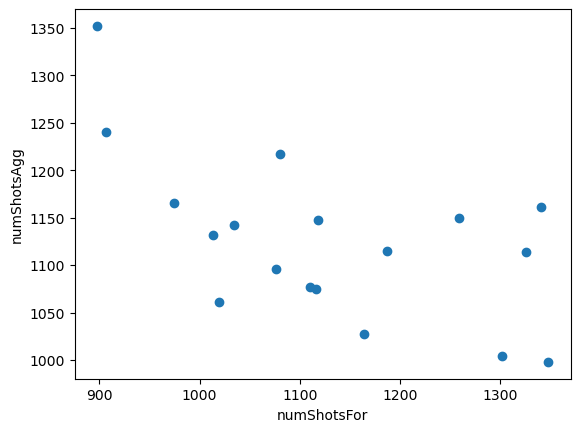

In [6]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'])

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

Text(0, 0.5, 'numShotsAgg')

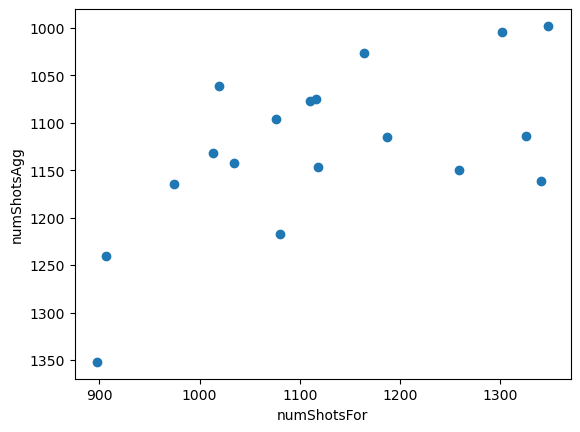

In [7]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'])

ax.invert_yaxis()

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

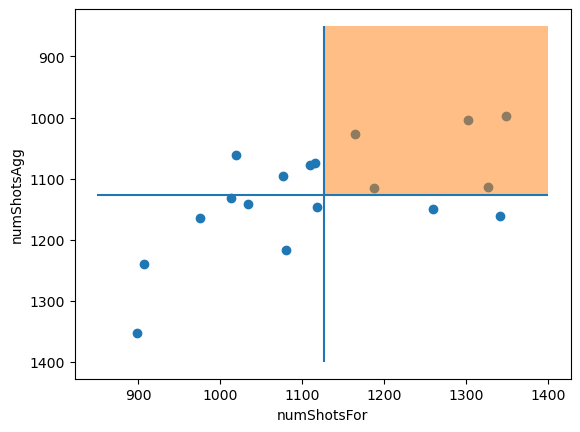

In [88]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'])

ax.invert_yaxis()

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

x_mean = xScore['numShotsFor'].mean()
y_mean = xScore['numShotsAgg'].mean()
x = np.linspace(x_mean, 1400, 200)
ax.fill_between(x, y1=850,y2=y_mean, alpha=0.5, interpolate=True)
ax.vlines(x=x_mean, ymin=850, ymax=1400)
ax.hlines(y=y_mean, xmin=850, xmax=1400)


Diamond Scatter Plot

In [8]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

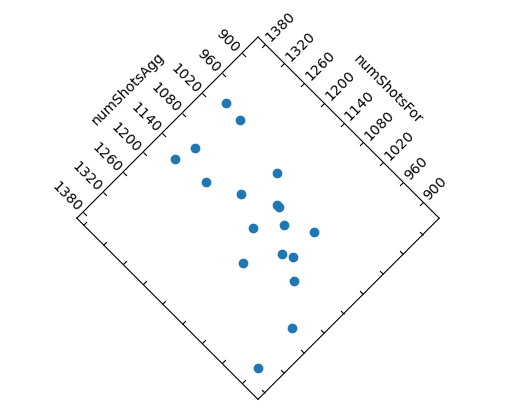

In [16]:
fig = plt.figure()
plot_extents = 850, 1400, 850, 1400
transform = Affine2D().rotate_deg(135)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
fig.add_subplot(ax)

ax.axis['left'].major_ticklabels.set_visible(False)
ax.axis['left'].label.set_visible(False)

ax.axis['right'].major_ticklabels.set_visible(True)
ax.axis['right'].label.set_visible(True)
ax.axis['right'].label.set_axis_direction("top")
ax.axis['right'].major_ticklabels.set_axis_direction("left")

ax.axis['bottom'].set_axis_direction("bottom")
ax.axis['bottom'].major_ticklabels.set_axis_direction("right")
ax.axis['bottom'].label.set_axis_direction("top")

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

aux_ax = ax.get_aux_axes(transform)
aux_ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'])

plt.show()

In [47]:
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)

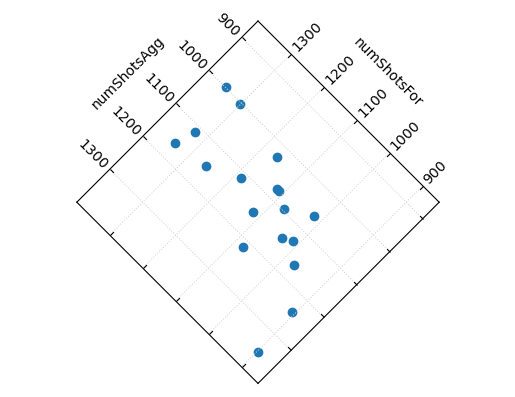

In [55]:
fig = plt.figure()
plot_extents = 850, 1400, 850, 1400
transform = Affine2D().rotate_deg(135)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents,
                                             grid_locator1=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            #  grid_locator1=MaxNLocator(nbins=5),
                                            grid_locator2=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            # grid_locator2=MaxNLocator(nbins=5)
                                             )
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
fig.add_subplot(ax)

ax.axis['left'].major_ticklabels.set_visible(False)
ax.axis['left'].label.set_visible(False)

ax.axis['right'].major_ticklabels.set_visible(True)
ax.axis['right'].label.set_visible(True)
ax.axis['right'].label.set_axis_direction("top")
ax.axis['right'].major_ticklabels.set_axis_direction("left")

ax.axis['bottom'].set_axis_direction("bottom")
ax.axis['bottom'].major_ticklabels.set_axis_direction("right")
ax.axis['bottom'].label.set_axis_direction("top")

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

aux_ax = ax.get_aux_axes(transform)
aux_ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'])

ax.grid(visible=True, lw=0.75, ls=":", color="lightgrey")
plt.show()

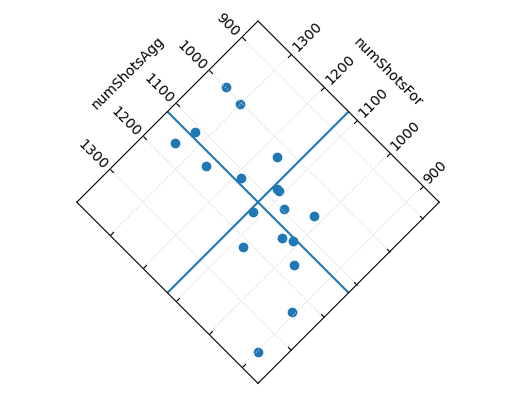

In [58]:
fig = plt.figure()
plot_extents = 850, 1400, 850, 1400
transform = Affine2D().rotate_deg(135)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents,
                                             grid_locator1=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            #  grid_locator1=MaxNLocator(nbins=5),
                                            grid_locator2=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            # grid_locator2=MaxNLocator(nbins=5)
                                             )
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
fig.add_subplot(ax)

ax.axis['left'].major_ticklabels.set_visible(False)
ax.axis['left'].label.set_visible(False)

ax.axis['right'].major_ticklabels.set_visible(True)
ax.axis['right'].label.set_visible(True)
ax.axis['right'].label.set_axis_direction("top")
ax.axis['right'].major_ticklabels.set_axis_direction("left")

ax.axis['bottom'].set_axis_direction("bottom")
ax.axis['bottom'].major_ticklabels.set_axis_direction("right")
ax.axis['bottom'].label.set_axis_direction("top")

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

ax.grid(visible=True, lw=0.75, ls=":", color="lightgrey")

aux_ax = ax.get_aux_axes(transform)
aux_ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'])
aux_ax.vlines(x=(850+1400)/2, ymin=850, ymax=1400)
aux_ax.hlines(y=(850+1400)/2, xmin=850, xmax=1400)
plt.show()

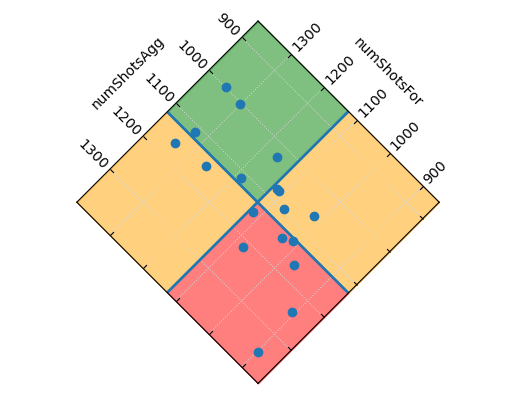

In [99]:
fig = plt.figure()
plot_extents = 850, 1400, 850, 1400
transform = Affine2D().rotate_deg(135)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents,
                                             grid_locator1=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            #  grid_locator1=MaxNLocator(nbins=5),
                                            grid_locator2=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            # grid_locator2=MaxNLocator(nbins=5)
                                             )
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
fig.add_subplot(ax)

ax.axis['left'].major_ticklabels.set_visible(False)
ax.axis['left'].label.set_visible(False)

ax.axis['right'].major_ticklabels.set_visible(True)
ax.axis['right'].label.set_visible(True)
ax.axis['right'].label.set_axis_direction("top")
ax.axis['right'].major_ticklabels.set_axis_direction("left")

ax.axis['bottom'].set_axis_direction("bottom")
ax.axis['bottom'].major_ticklabels.set_axis_direction("right")
ax.axis['bottom'].label.set_axis_direction("top")

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

ax.grid(visible=True, lw=0.75, ls=":", color="lightgrey")

aux_ax = ax.get_aux_axes(transform)
aux_ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'], zorder=3)
aux_ax.vlines(x=(850+1400)/2, ymin=850, ymax=1400)
aux_ax.hlines(y=(850+1400)/2, xmin=850, xmax=1400)

x_mean = xScore['numShotsFor'].mean()
y_mean = xScore['numShotsAgg'].mean()

# Quadrants
aux_ax.vlines(x=x_mean, ymin=850, ymax=1400)
aux_ax.hlines(y=y_mean, xmin=850, xmax=1400)

# Top Quadrant
x = np.linspace(x_mean, 1400, 200)
aux_ax.fill_between(x, y1=850,y2=y_mean, alpha=0.5, color = "green", interpolate=True)

# Bottom Quadrant
x = np.linspace(850, x_mean, 200)
aux_ax.fill_between(x, y1=y_mean,y2=1400, alpha=0.5, color = "red", interpolate=True)

# Left Quadrant
x = np.linspace(x_mean, 1400, 200)
aux_ax.fill_between(x, y1=y_mean,y2=1400, alpha=0.5, color = "orange", interpolate=True)

# Right Quadrant
x = np.linspace(850, x_mean, 200)
aux_ax.fill_between(x, y1=850,y2=y_mean, alpha=0.5, color = "orange", interpolate=True)

plt.show()

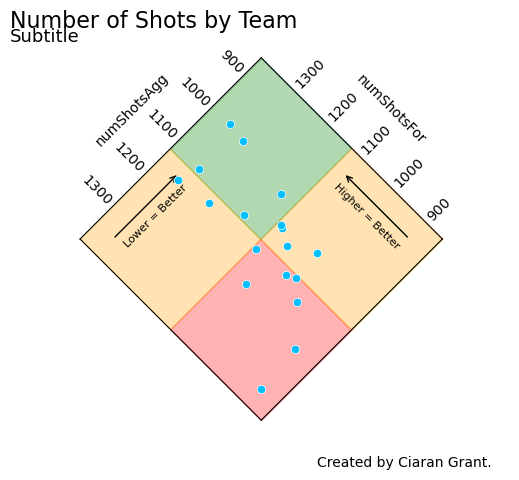

In [207]:
BACKGROUND_COLOUR = "white"
AXIS_COLOUR = "black"
AXIS_LABEL_COLOUR = AXIS_COLOUR
AXIS_TICK_COLOUR = AXIS_COLOUR
AXIS_LINE_COLOUR = AXIS_COLOUR
SCATTER_COLOUR = "deepskyblue"

fig = plt.figure()
plot_extents = 850, 1400, 850, 1400
transform = Affine2D().rotate_deg(135)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents,
                                             grid_locator1=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            #  grid_locator1=MaxNLocator(nbins=5),
                                            grid_locator2=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            # grid_locator2=MaxNLocator(nbins=5)
                                             )
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
fig.add_subplot(ax)
fig.set_facecolor(BACKGROUND_COLOUR)
ax.set_facecolor(BACKGROUND_COLOUR)
ax.axis[:].label.set_color(AXIS_LABEL_COLOUR)
ax.axis[:].major_ticklabels.set_color(AXIS_TICK_COLOUR)
ax.axis[:].major_ticks.set_visible(False)
ax.axis[:].line.set_color(AXIS_LINE_COLOUR)

ax.axis['left'].major_ticklabels.set_visible(False)
ax.axis['left'].label.set_visible(False)


ax.axis['right'].major_ticklabels.set_visible(True)
ax.axis['right'].label.set_visible(True)
ax.axis['right'].label.set_axis_direction("top")
ax.axis['right'].major_ticklabels.set_axis_direction("left")

ax.axis['bottom'].set_axis_direction("bottom")
ax.axis['bottom'].major_ticklabels.set_axis_direction("right")
ax.axis['bottom'].label.set_axis_direction("top")

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

# ax.grid(visible=True, lw=0.75, ls=":", color="grey")


aux_ax = ax.get_aux_axes(transform)
aux_ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'], color = SCATTER_COLOUR,
               edgecolor="w", linewidth=0.5, zorder=3)

x_mean = xScore['numShotsFor'].mean()
y_mean = xScore['numShotsAgg'].mean()

# Quadrants
# aux_ax.vlines(x=x_mean, ymin=850, ymax=1400, linestyles="dashed", color="grey")
# aux_ax.hlines(y=y_mean, xmin=850, xmax=1400, linestyles="dashed", color="grey")

# Top Quadrant
x = np.linspace(x_mean, 1400, 200)
aux_ax.fill_between(x, y1=850,y2=y_mean, alpha=0.3, color = "green", interpolate=True)

# Bottom Quadrant
x = np.linspace(850, x_mean, 200)
aux_ax.fill_between(x, y1=y_mean,y2=1400, alpha=0.3, color = "red", interpolate=True)

# Left Quadrant
x = np.linspace(x_mean, 1400, 200)
aux_ax.fill_between(x, y1=y_mean,y2=1400, alpha=0.3, color = "orange", interpolate=True)

# Right Quadrant
x = np.linspace(850, x_mean, 200)
aux_ax.fill_between(x, y1=850,y2=y_mean, alpha=0.3, color = "orange", interpolate=True)

# Arrow directions
aux_ax.annotate("", xy=(1100, 900), xytext=(900, 900), zorder=1,
            arrowprops=dict(arrowstyle="->"))
aux_ax.annotate("Higher = Better", xy=(1000,930), ha="center", va="center",
                fontsize=8, rotation=-45)

aux_ax.annotate("", xy=(1350, 1150), xytext=(1350, 1350), zorder=1,
            arrowprops=dict(arrowstyle="->"))
aux_ax.annotate("Lower = Better", xy=(1320,1250), ha="center", va="center",
                fontsize=8, rotation=45)

# Label Quadrants


# Text
## Title
fig.text(0.12, 0.935, "Number of Shots by Team", fontsize=16)
fig.text(0.12, 0.905, "Subtitle", fontsize=13)

## Footer text
fig.text(0.6, 0.02, "Created by Ciaran Grant.")

plt.show()

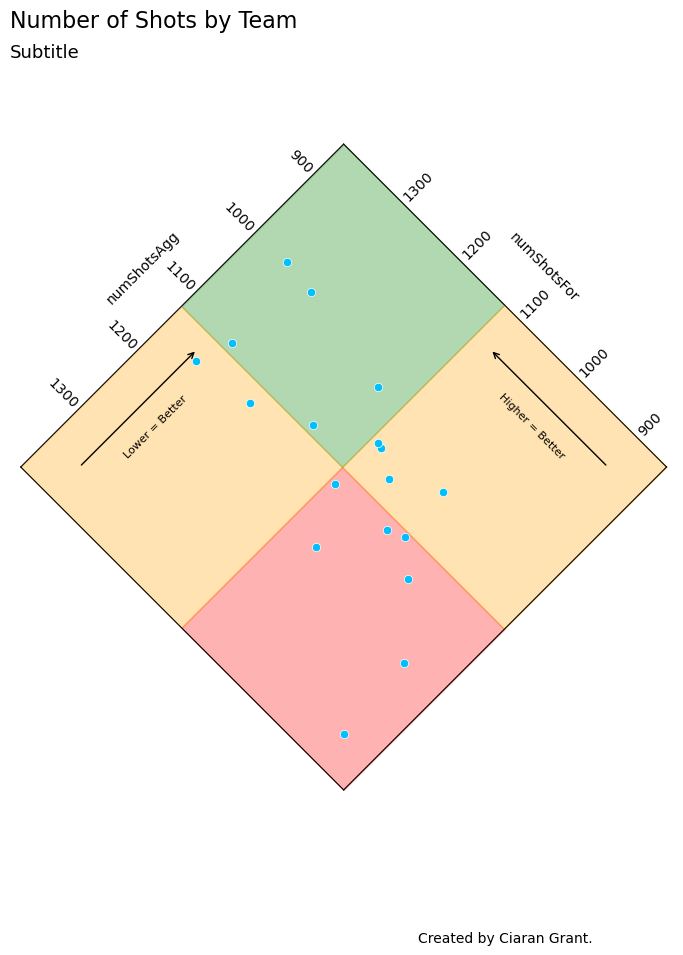

In [208]:
BACKGROUND_COLOUR = "white"
AXIS_COLOUR = "black"
AXIS_LABEL_COLOUR = AXIS_COLOUR
AXIS_TICK_COLOUR = AXIS_COLOUR
AXIS_LINE_COLOUR = AXIS_COLOUR
SCATTER_COLOUR = "deepskyblue"

fig = plt.figure(figsize=(8.5, 10))
plot_extents = 850, 1400, 850, 1400
transform = Affine2D().rotate_deg(135)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents,
                                             grid_locator1=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            #  grid_locator1=MaxNLocator(nbins=5),
                                            grid_locator2=FixedLocator([900, 1000, 1100, 1200, 1300]),
                                            # grid_locator2=MaxNLocator(nbins=5)
                                             )
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
fig.add_subplot(ax)
fig.set_facecolor(BACKGROUND_COLOUR)
ax.set_facecolor(BACKGROUND_COLOUR)
ax.axis[:].label.set_color(AXIS_LABEL_COLOUR)
ax.axis[:].major_ticklabels.set_color(AXIS_TICK_COLOUR)
ax.axis[:].major_ticks.set_visible(False)
ax.axis[:].line.set_color(AXIS_LINE_COLOUR)

ax.axis['left'].major_ticklabels.set_visible(False)
ax.axis['left'].label.set_visible(False)


ax.axis['right'].major_ticklabels.set_visible(True)
ax.axis['right'].label.set_visible(True)
ax.axis['right'].label.set_axis_direction("top")
ax.axis['right'].major_ticklabels.set_axis_direction("left")

ax.axis['bottom'].set_axis_direction("bottom")
ax.axis['bottom'].major_ticklabels.set_axis_direction("right")
ax.axis['bottom'].label.set_axis_direction("top")

ax.set_xlabel("numShotsFor")
ax.set_ylabel("numShotsAgg")

# ax.grid(visible=True, lw=0.75, ls=":", color="grey")


aux_ax = ax.get_aux_axes(transform)
aux_ax.scatter(xScore['numShotsFor'], xScore['numShotsAgg'], color = SCATTER_COLOUR,
               edgecolor="w", linewidth=0.5, zorder=3)

x_mean = xScore['numShotsFor'].mean()
y_mean = xScore['numShotsAgg'].mean()

# Quadrants
# aux_ax.vlines(x=x_mean, ymin=850, ymax=1400, linestyles="dashed", color="grey")
# aux_ax.hlines(y=y_mean, xmin=850, xmax=1400, linestyles="dashed", color="grey")

# Top Quadrant
x = np.linspace(x_mean, 1400, 200)
aux_ax.fill_between(x, y1=850,y2=y_mean, alpha=0.3, color = "green", interpolate=True)

# Bottom Quadrant
x = np.linspace(850, x_mean, 200)
aux_ax.fill_between(x, y1=y_mean,y2=1400, alpha=0.3, color = "red", interpolate=True)

# Left Quadrant
x = np.linspace(x_mean, 1400, 200)
aux_ax.fill_between(x, y1=y_mean,y2=1400, alpha=0.3, color = "orange", interpolate=True)

# Right Quadrant
x = np.linspace(850, x_mean, 200)
aux_ax.fill_between(x, y1=850,y2=y_mean, alpha=0.3, color = "orange", interpolate=True)

# Arrow directions
aux_ax.annotate("", xy=(1100, 900), xytext=(900, 900), zorder=1,
            arrowprops=dict(arrowstyle="->"))
aux_ax.annotate("Higher = Better", xy=(1000,930), ha="center", va="center",
                fontsize=8, rotation=-45)

aux_ax.annotate("", xy=(1350, 1150), xytext=(1350, 1350), zorder=1,
            arrowprops=dict(arrowstyle="->"))
aux_ax.annotate("Lower = Better", xy=(1320,1250), ha="center", va="center",
                fontsize=8, rotation=45)

# Label Quadrants


# Text
## Title
fig.text(0.12, 0.935, "Number of Shots by Team", fontsize=16)
fig.text(0.12, 0.905, "Subtitle", fontsize=13)

## Footer text
fig.text(0.6, 0.02, "Created by Ciaran Grant.")

plt.show()